In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
%matplotlib inline
sns.set()




In [2]:
df_train = pd.read_csv('train.csv')

In [43]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [4]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/Users/jietang/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


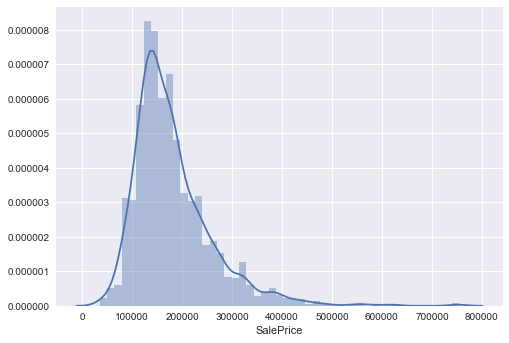

In [53]:
sns.distplot(df_train['SalePrice'])

In [6]:
print("Skewness:{0}".format(df_train['SalePrice'].skew()))
print("Kurtosis:{0}".format(df_train['SalePrice'].kurt()))

Skewness:1.8828757597682129
Kurtosis:6.536281860064529


In [7]:
def relation_scatter(var):
    data = pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
#     print(data.head(10))
    data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))


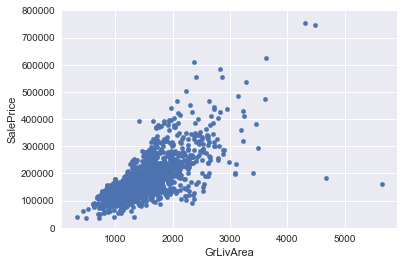

In [8]:
relation_scatter('GrLivArea')

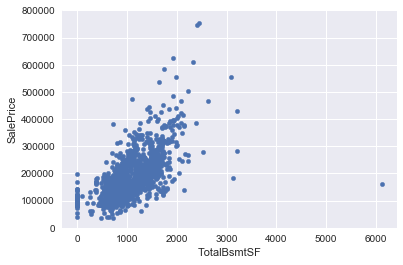

In [9]:
relation_scatter('TotalBsmtSF')

In [10]:
def relation_box(var):
    data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=var, y="SalePrice", data=data)
    fig.axis(ymin=0, ymax=800000)

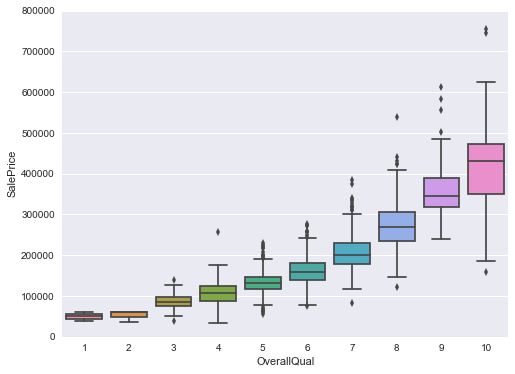

In [11]:
relation_box('OverallQual')

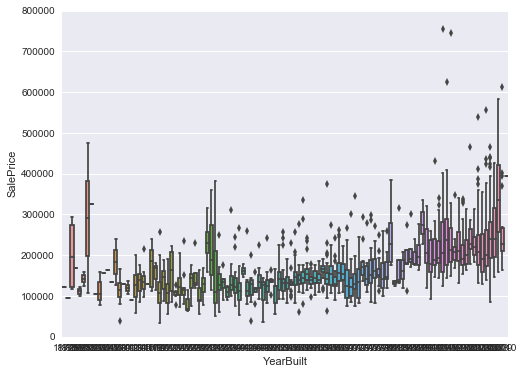

In [12]:
relation_box('YearBuilt')

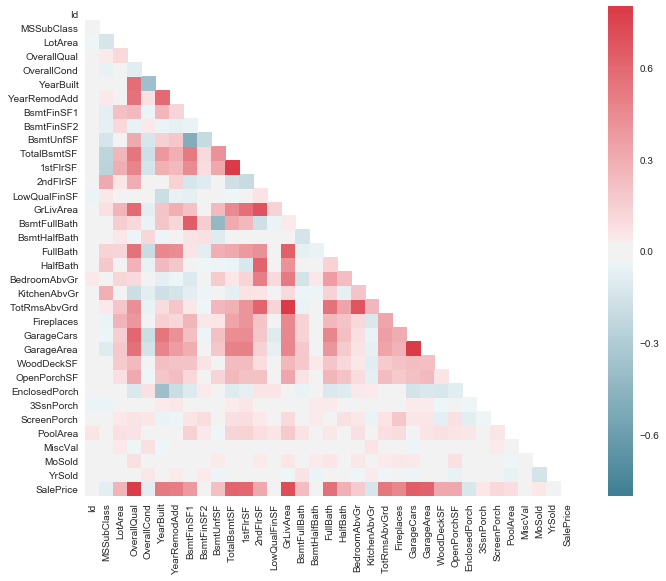

In [61]:
sns.set(style="white")


corrmat = df_train.corr()

mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f,ax = plt.subplots(figsize=(12,9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corrmat,mask=mask,cmap=cmap,vmax=0.8,square=True)

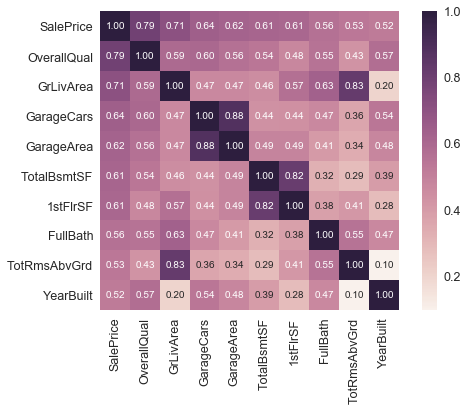

In [57]:
sns.set(style="white")
k = 10
cols = corrmat.nlargest(k,'SalePrice').index
cm = np.corrcoef(df_train[cols].values.T)

mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.set(font_scale=1.25)
hm = sns.heatmap(cm,  cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


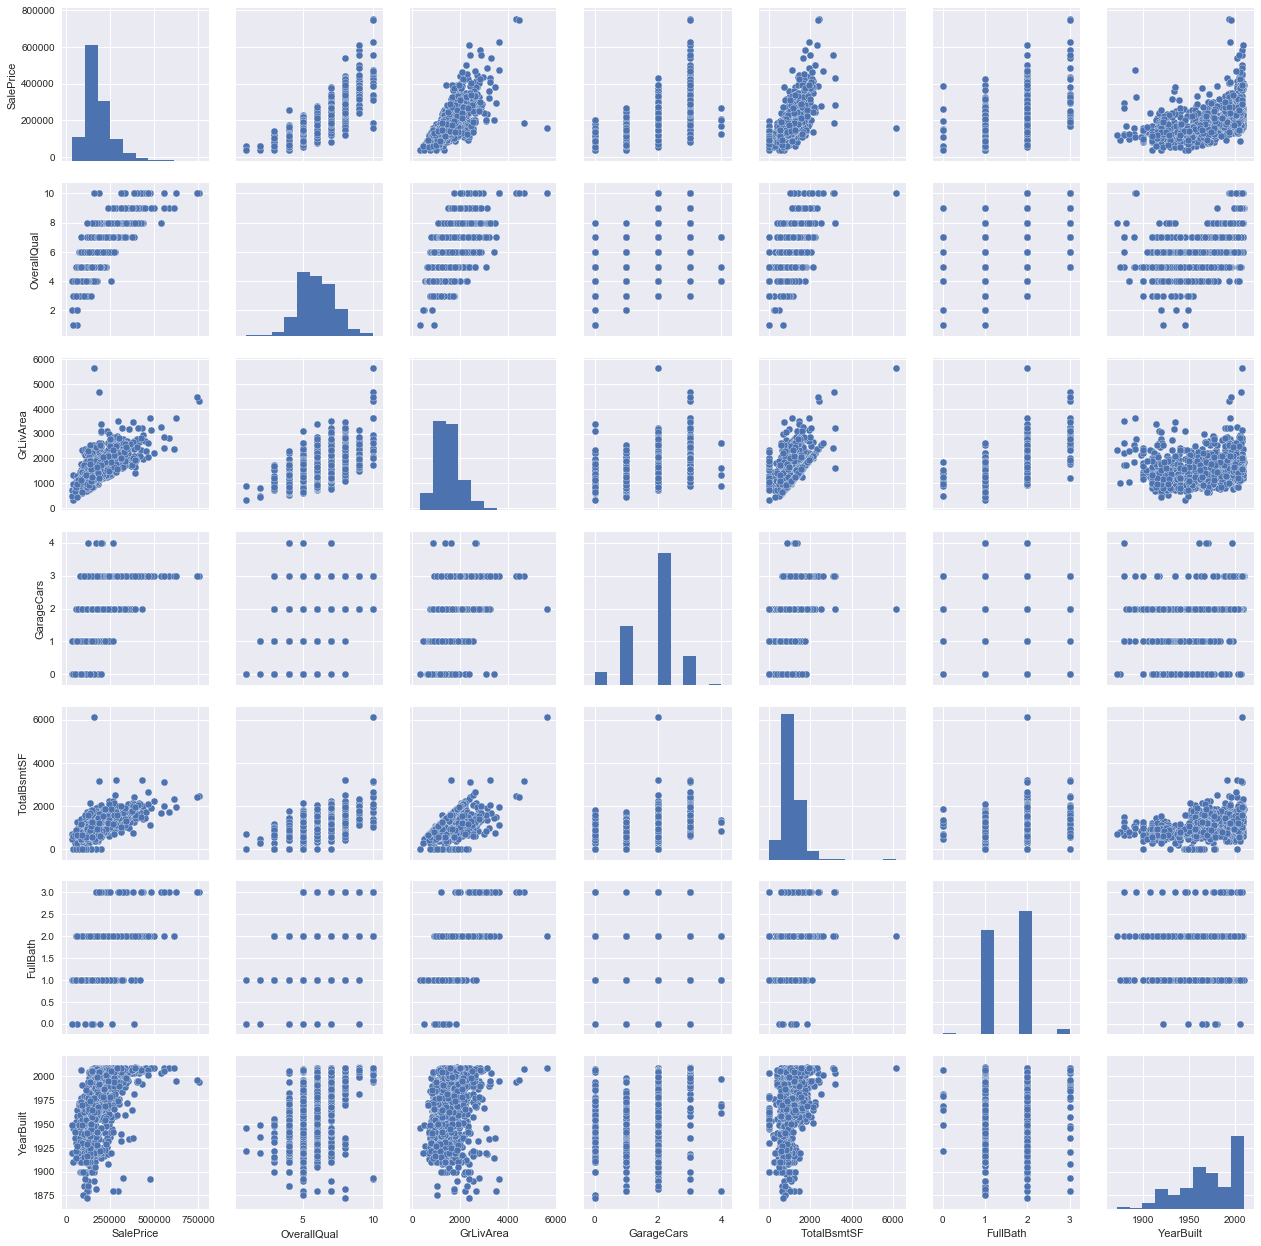

In [27]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show()


In [28]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [30]:
#dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #just checking that there's no missing data missing...


0

In [62]:
corrmat.head(10)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.010589,-0.033170,-0.027553,0.013167,-0.013945,-0.023158,-0.004001,-0.005668,-0.007508,...,-0.029716,0.000267,0.003272,-0.046550,0.001617,0.057163,-0.006155,0.021708,0.000566,-0.021756
MSSubClass,0.010589,1.000000,-0.139766,0.032936,-0.059134,0.027435,0.040199,-0.069501,-0.065549,-0.140627,...,-0.012598,-0.005838,-0.011904,-0.043786,-0.025932,0.008309,-0.007651,-0.013404,-0.021461,-0.084230
LotArea,-0.033170,-0.139766,1.000000,0.105786,-0.005665,0.014296,0.013852,0.214121,0.111158,-0.002641,...,0.171701,0.084751,-0.018360,0.020417,0.043147,0.077669,0.038063,0.001179,-0.014254,0.263837
OverallQual,-0.027553,0.032936,0.105786,1.000000,-0.092243,0.573334,0.551605,0.239265,-0.059291,0.308018,...,0.239000,0.308554,-0.114162,0.030314,0.064755,0.065143,-0.031461,0.070570,-0.027277,0.791069
OverallCond,0.013167,-0.059134,-0.005665,-0.092243,1.000000,-0.375780,0.074158,-0.046595,0.040132,-0.137008,...,-0.003318,-0.032847,0.070238,0.025465,0.054721,-0.002009,0.068752,-0.003685,0.044003,-0.077924
YearBuilt,-0.013945,0.027435,0.014296,0.573334,-0.375780,1.000000,0.592512,0.250465,-0.048903,0.149444,...,0.224946,0.189359,-0.387177,0.031461,-0.050175,0.005006,-0.034330,0.012791,-0.013733,0.523273
YearRemodAdd,-0.023158,0.040199,0.013852,0.551605,0.074158,0.592512,1.000000,0.129259,-0.067575,0.181520,...,0.205773,0.226944,-0.193740,0.045389,-0.038558,0.005882,-0.010226,0.021860,0.035656,0.507430
BsmtFinSF1,-0.004001,-0.069501,0.214121,0.239265,-0.046595,0.250465,0.129259,1.000000,-0.050328,-0.495718,...,0.204403,0.111346,-0.102581,0.026382,0.061862,0.140491,0.003514,-0.016060,0.014456,0.386436
BsmtFinSF2,-0.005668,-0.065549,0.111158,-0.059291,0.040132,-0.048903,-0.067575,-0.050328,1.000000,-0.209395,...,0.067909,0.002954,0.036475,-0.030017,0.088823,0.041697,0.004923,-0.015309,0.031734,-0.011412
BsmtUnfSF,-0.007508,-0.140627,-0.002641,0.308018,-0.137008,0.149444,0.181520,-0.495718,-0.209395,1.000000,...,-0.005304,0.128835,-0.002640,0.020732,-0.012657,-0.035114,-0.023863,0.034754,-0.041221,0.214446


In [1]:
%%HTML
<button onclick="$('.input, .prompt, .output_stderr, .output_error, .output_result').toggle();">Toggle Code</button>
